### 회귀와 분류 

<img src = 'https://s3-ap-northeast-2.amazonaws.com/opentutorials-user-file/module/4916/12309.jpeg' width = 800>

###### [출처 : 회귀 VS 분류](https://opentutorials.org/module/4916/28942)

회귀 분류는 데이터를 분석하여 미래 값을 예측하거나, 주어진 데이터를 특정 그룹으로 분류하는 작업입니다.<p>

회귀(Regression)는 연속적인 값을 예측하는 작업입니다. 예를 들어, 주택 가격을 예측하려면 주택의 크기, 위치, 방의 개수 등과 같은 여러 요소를 사용하여 주택 가격을 예측할 수 있습니다.<p>

분류(Classification)는 이산적인 값을 예측하는 작업입니다. 예를 들어, 이메일을 "스팸" 또는 "스팸이 아님"으로 분류하는 작업에서는 이메일의 제목, 본문 내용, 발신자 등의 특징을 분석하여 해당 이메일이 스팸인지 아닌지를 예측할 수 있습니다.<p>

회귀 분류는 이러한 두 가지 작업을 결합한 것으로, 주어진 데이터의 특징을 사용하여 연속적인 값을 예측하거나, 해당 데이터를 특정 그룹 또는 클래스로 분류하는 작업을 수행합니다.<p>

### OLS : Ordinary Linear Least Square

일반적인 최소자승법(OLS) 회귀는 주어진 데이터를 가장 잘 설명하는 선을 찾는 방법입니다. 이 선은 예측 값과 실제 값 사이의 차이를 최소화하는 방향으로 그려집니다.<p>

OLS 회귀는 독립 변수(입력 값)와 종속 변수(출력 값) 간의 선형 관계를 가정합니다. 이를 통해 독립 변수가 변함에 따라 종속 변수가 어떻게 변하는지를 설명할 수 있습니다. 회귀 분석을 통해 독립 변수와 종속 변수 사이의 관계를 수학적으로 표현하는 선형 방정식을 찾아냅니다.<p>

OLS 회귀는 예측 값과 실제 값 사이의 오차를 최소화하는 방향으로 선을 조정합니다. 이를 위해 오차의 제곱을 계산하고, 이 제곱 오차의 합을 최소화하는 선을 찾습니다. 이렇게 찾아낸 선을 기반으로 새로운 입력 값에 대한 출력 값을 예측할 수 있습니다.<p>

OLS 회귀는 선형 관계를 전제로 하기 때문에, 데이터가 비선형적인 패턴을 가지거나 모델의 가정을 위배하는 경우 정확한 결과를 얻을 수 없을 수 있습니다. 따라서 데이터의 특성과 문제의 복잡성을 고려하여 다른 회귀 방법을 사용할 필요가 있을 수 있습니다.<p>


<img src = 'https://gregorygundersen.com/image/ols/rss.png'>

[Ordinary Least Squares](https://gregorygundersen.com/blog/2020/01/04/ols/)

In [2]:
!pip install statsmodels

In [14]:
import pandas as pd

data = {'x' : [1,2,3,4,5], 'y' : [1, 3, 4, 6, 5]}
df = pd.DataFrame(data)

In [15]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula='y ~ x', data=df).fit()

In [16]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

In [17]:
# %load ../set_matplotlib_hangul.py

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
import platform

# %matplotlib inline
get_ipython().run_line_magic("matplotlib","inline")

path='C:/Windows/Fonts/malgun.ttf'
plt.rcParams['axes.unicode_minus'] = False

if platform.system()=="Darwin": #mac
    rc("font",family='Arial Unicodes MS')
    sns.set(font='Arial Unicodes MS', 
        rc={"axes.unicode_minus":False}),
    print('MAC Hangul OK')
elif platform.system()=="Windows":  #window
    font_name=font_manager.FontProperties(fname=path).get_name()
    rc("font",family=font_name)
    sns.set(font=font_name, 
    rc={"axes.unicode_minus":False})
    print('WIndow Hangul OK')
    
else:
    print('Unknown System')
    


WIndow Hangul OK


(0.0, 5.0)

<Figure size 1000x700 with 0 Axes>

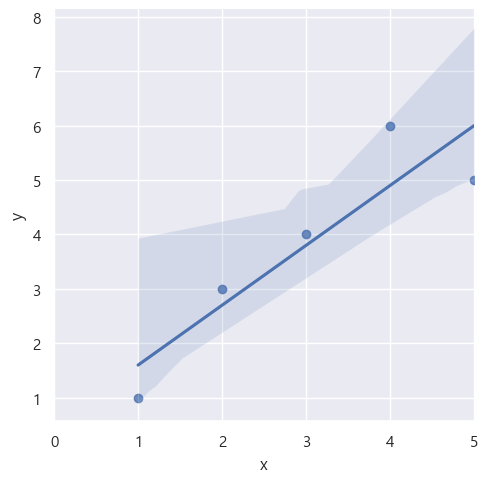

In [20]:
plt.figure(figsize=(10,7))
sns.lmplot(x='x', y='y', data=df)
plt.xlim([0,5])

#### 잔차 평가 residue
회귀 모델에서 예측 값과 실제 값 간의 차이를 의미합니다. 잔차 평가는 회귀 모델의 예측 능력과 모델의 적합성을 평가하기 위해 잔차에 대한 분석을 수행하는 과정입니다.

- 잔차는 평균이 0인 정규분포를 따르는 것 이어야 함
- 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는지 확인


In [22]:
resid = lm_model.resid
resid # 예측 값과 실제 값 간의 차

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

#### 결정계수 R-Squared
결정계수(R-Squared)는 회귀 모델의 설명력을 나타내는 지표입니다.<p>
R-Squared 값은 종속 변수의 총 변동 중 회귀 모델에 의해 설명되는 비율을 나타냅니다.

R-Squared 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 더 잘 설명한다는 의미입니다.<p>
R-Squared 값이 1에 가까운 경우, 회귀 모델이 종속 변수의 변동을 거의 완벽하게 설명하고 있다고 해석할 수 있습니다. <p>
반면에 R-Squared 값이 0에 가까울수록 모델이 종속 변수의 변동을 설명하지 못하고 있다는 의미입니다.

<img src = 'https://www.saedsayad.com/images/MLR_r2.png'>

Formula for R-squared (Image by <a href = 'https://www.saedsayad.com/model_evaluation_r.htm' >Author</a>)

In [26]:
import numpy as np

mu = np.mean(df['y'])
y = df['y']

y_hat = lm_model.predict()
np.sum( (y_hat - mu)**2 ) / np.sum( (y-mu)**2) 


0.8175675675675674

In [27]:
lm_model.rsquared

0.8175675675675675

<Axes: ylabel='Density'>

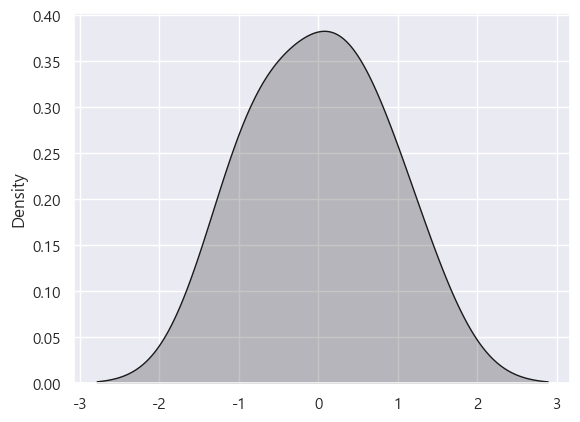

In [42]:
sns.kdeplot(resid, color='k', fill=True)


### 통계적 회귀

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)

#### 데이터 
- Avg. Session Length : 한번 접속했을 때 평균 어느 정도의 시간을 사용하는지에 대한 데이터 
- Time on App : 폰 앱으로 접속했을 때 유지 시간 (분)
- Time on Website : 웹사이트로 접속했을 때 유지 시간 (분)
- Length of Membership : 회원 자격 유지 기간 (연)

In [46]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [48]:
data.drop(['Email', 'Address', 'Avatar'], axis=1, inplace=True)
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


<Axes: >

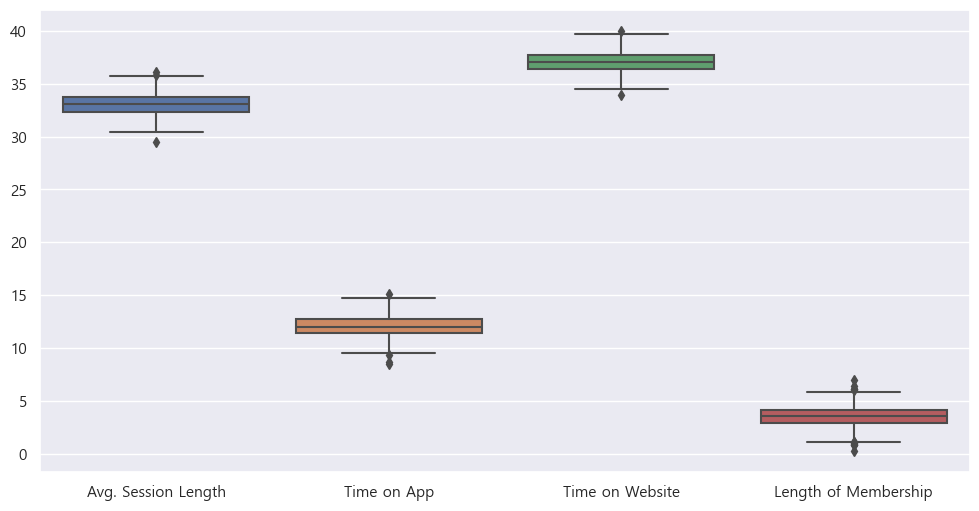

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data.iloc[:,:-1])

<Axes: >

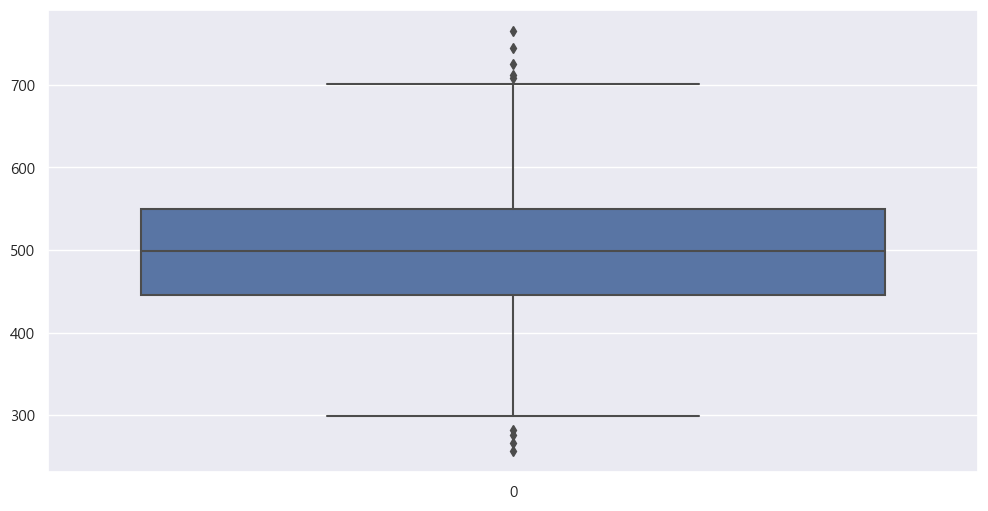

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data['Yearly Amount Spent'])

#### 데이터 분석
#### Length of Membership 와 Yearly Amount Spent 가 선형 관계로 보임

<Figure size 1200x600 with 0 Axes>

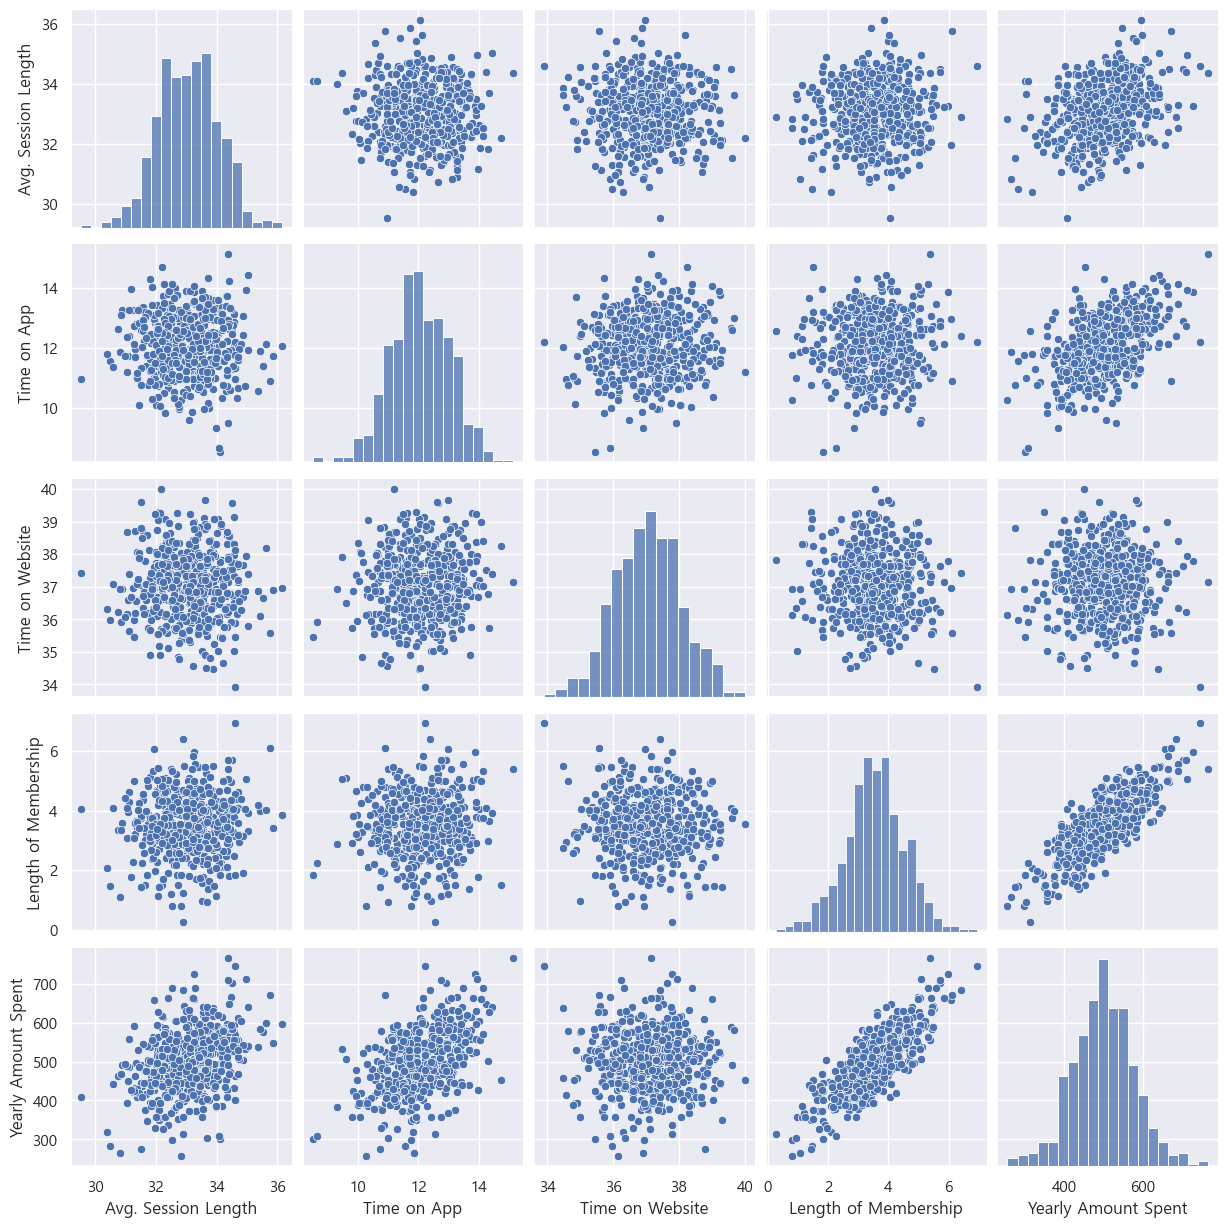

In [54]:
plt.figure(figsize=(12,6))
sns.pairplot(data=data)

In [55]:
data.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Figure size 1200x600 with 0 Axes>

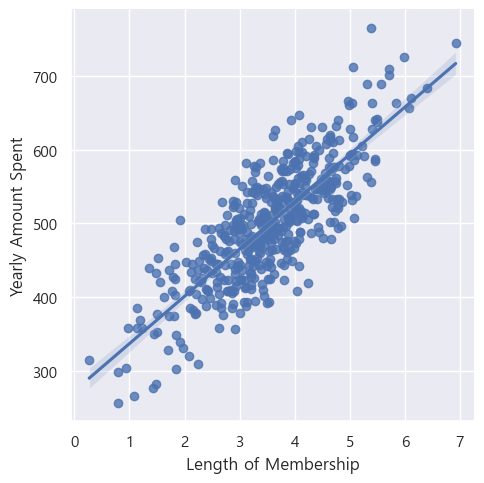

In [57]:
plt.figure(figsize=(12, 6))
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=data)

In [77]:
import statsmodels.api as sm

X = data['Length of Membership']
y = data['Yearly Amount Spent']

lm = sm.OLS(y, X).fit()


Dep. Variable: 회귀 모델에서 종속 변수로 사용된 변수는 'Length of Membership'입니다. <p>
R-squared: 모델의 설명력을 나타내는 지표로, 0.970으로 상당히 높습니다. 이는 회귀 모델이 종속 변수의 변동을 97% 정도 설명할 수 있다는 것을 의미합니다.<p>
Adj. R-squared: 조정된 R-squared 값으로, 독립 변수의 수와 표본 크기에 따라 조정된 값을 제공합니다. 0.970으로 매우 높은 설명력을 가지고 있습니다.<p>
F-statistic: 회귀 모델의 통계적 유의성을 나타내는 지표로, 1.617e+04로 매우 높습니다. 이는 모델이 통계적으로 유의미한 예측 능력을 가진다는 것을 의미합니다.<p>
P-value: F-statistic에 대한 유의확률로, 0.00으로 매우 작습니다. 이는 모델이 통계적으로 유의미한 예측 능력을 가지고 있다는 것을 의미합니다.<p>
coef: 독립 변수 'Yearly Amount Spent'의 계수는 0.0072입니다. 이는 'Yearly Amount Spent'가 'Length of Membership'에 대해 양의 관계를 가지고 있다는 것을 의미합니다.<p>
std err: 계수의 표준 오차는 5.63e-05입니다. 이는 계수 추정치의 신뢰도를 나타냅니다.<p>
t-value: 계수에 대한 t-검정 통계량은 127.145입니다. 이 값은 계수가 0과 유의하게 다르다는 것을 나타냅니다.<p>
P>|t|: 계수에 대한 t-검정의 유의확률로, 0.000으로 매우 작습니다. 이는 'Yearly Amount Spent'가 'Length of Membership'와 <p>

In [72]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Fri, 19 May 2023   Prob (F-statistic):                        0.00
Time:                         12:59:05   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

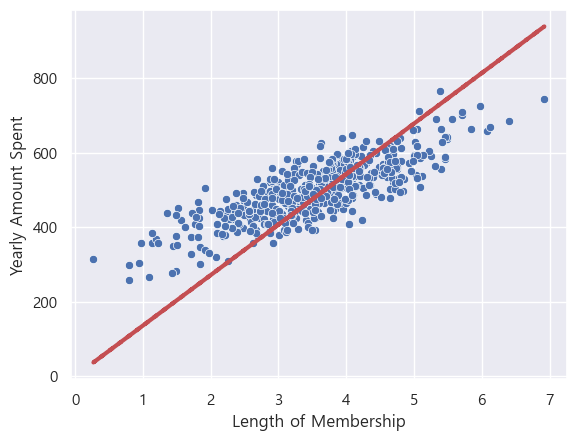

In [73]:
pred = lm.predict(X)

sns.scatterplot(x=X, y=Y)
plt.plot(X, pred, 'r', ls='dashed', lw=3)

#### 상수항 추가

In [78]:
# 넘파이 열 추가 
X = np.c_[X, [1]*len(X)]
X[:5]


array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

AIC (Akaike Information Criterion): AIC는 모델의 적합도와 복잡성을 고려하여 모델의 상대적인 품질을 평가하는 지표입니다. <p>
AIC는 가능도 함수와 모델의 자유도를 기반으로 계산됩니다. <p>
AIC 값은 작을수록 모델의 성능이 더 좋다고 판단됩니다. 따라서 AIC를 사용하여 여러 모델 간의 비교를 수행하고, 최적의 모델을 선택할 수 있습니다.<p>
<p>
R-squared (결정계수): R-squared는 회귀 모델이 종속 변수의 변동을 얼마나 잘 설명하는지를 나타내는 지표입니다. <p>
R-squared 값은 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 더 잘 설명한다는 것을 의미합니다. <p>
R-squared는 종속 변수의 총 변동 중 회귀 모델에 의해 설명되는 비율을 나타냅니다. <p>
따라서 R-squared를 사용하여 모델의 설명력을 평가하고, 여러 모델 간의 비교를 수행할 수 있습니다.<p>
<p>
AIC와 R-squared는 모두 모델의 성능을 평가하는 지표이지만, 다른 측면을 나타내므로 함께 사용할 수 있습니다. <p>
AIC는 모델의 복잡성을 고려하여 최적의 모델을 선택하는 데 도움을 주며, R-squared는 모델의 설명력을 평가하여 데이터를 얼마나 잘 설명하는지를 확인하는 데 사용됩니다.<p>

In [79]:
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Fri, 19 May 2023   Prob (F-statistic):          4.81e-117
Time:                         13:04:26   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

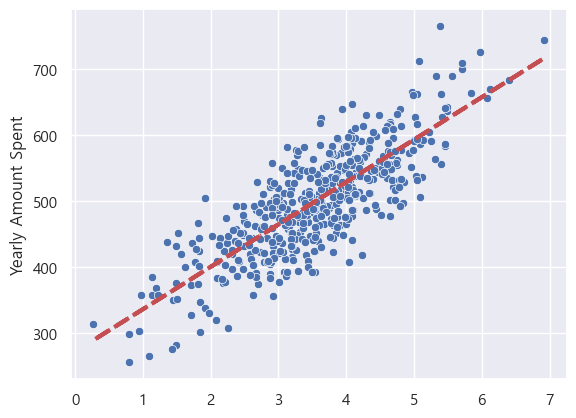

In [82]:
pred = lm.predict(X)

sns.scatterplot(x=X[:,0], y=Y)
plt.plot(X[:,0], pred, 'r', ls='dashed', lw=3)

### 데이터 분리

In [86]:
from sklearn.model_selection import train_test_split

X = data.drop(['Yearly Amount Spent'], axis=1)
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [87]:
lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.884e+04
Date:                 Fri, 19 May 2023   Prob (F-statistic):                        0.00
Time:                         13:11:54   Log-Likelihood:                         -1816.5
No. Observations:                  400   AIC:                                      3641.
Df Residuals:                      396   BIC:                                      3657.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     12.0166      0.832     14.440      0.000      10.381      13.653
Time on App             35.2145      1.129     31.197      0.000      32.995      37.434
Time on Website        -14.4797      0.774    -18.715      0.000     -16.001     -12.959
Length of Membership    60.7148      1.151     52.742      0.000      58.452      62.978
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.571
Skew:                          -0.038   Prob(JB):                        0.752
Kurtosis:                       2.832   Cond. No.                         54.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 참 VS 예측값

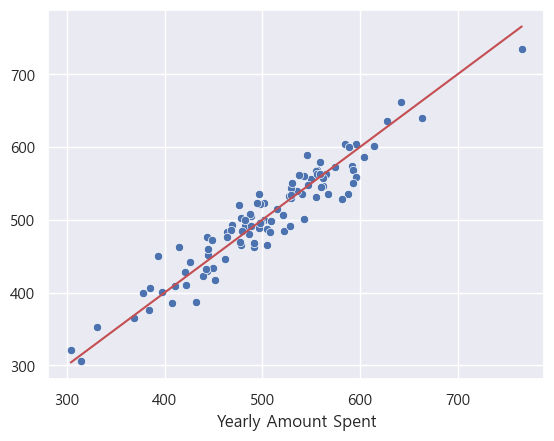

In [88]:
pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r')